<a href="https://colab.research.google.com/github/edulapalle/CS584-ML-HW3/blob/main/ML_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Santosh Reddy Edulapalle**

ML-HW3

Reference - https://towardsdatascience.com/multi-output-model-with-tensorflow-keras-functional-api-875dd89aa7c6

In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading dataset

In [221]:
#required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras import Sequential

path = "/content/drive/MyDrive/A20501739_CollectedData_annotation.csv"
df = pd.read_csv(path)
df.head(5)

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Handling Null values**

Since our objective is to find the center of the image by taking average of topleft and rightbottom corners, we will simply take all NA values to be 0 so we don't get errors while doing calculations with any null values.

In [222]:
#replacing all NA with 0
df.fillna(0,inplace = True)
df.head(5)

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,0.0,0,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,0.0,0,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,0.0,0,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0


In [223]:

cols = ["scorer","id","img","m1_topleft_x","m1_topleft_y","m1_rightdown_x","m1_rightdown_y","m1_nose_x","m1_nose_y","m1_leftear_x","m1_leftear_y","m1_rightear_x","m1_rightear_y","m1_leftHip_x","m1_leftHip_y","m1_rightHip_x","m1_rightHip_y","m1_tailBase_x","m1_tailBase_y","m1_tailEnd_x","m1_tailEnd_y","m2_topleft_x","m2_topleft_y","m2_rightdown_x","m2_rightdown_y","m2_nose_x","m2_nose_y","m2_leftear_x","m2_leftear_y","m2_rightear_x","m2_rightear_y","m2_leftHip_x","m2_leftHip_y","m2_rightHip_x","m2_rightHip_y","m2_tailBase_x","m2_tailBase_y","m2_tailEnd_x","m2_tailEnd_y"]

#m1- mouse 1
#m2- mouse 2

In [224]:
#renaming the columns
# we want to split the data, so we are renaming columns for reference.
df.columns = cols
#df.set_axis(cols, axis='columns', inplace=True)
df.head(5)

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y
0,individuals,0.0,0,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,0.0,0,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,0.0,0,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0


We will try to copy data to dummy df and perfrom some operations.


In [225]:
#top-3 rows are just additional data, we don't require them. Deleteing top 3 rows
df_copy = df
df_copy = df_copy[3:]


df_copy.head(5)

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,0,0,0,0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,0,0,0,0
5,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.84028879670976,189.79097324447577,338.9385009785614,285.0777848426165,156.75011720291639,220.28275295588077,181.90583546482554,...,0,0,0,0,0,0,0,0,0,0
6,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.0779943039246,202.74997962182283,366.38110271882596,348.34822774378193,159.79929517405688,269.0696004941288,174.28289053697426,...,0,0,0,0,0,0,0,0,0,0
7,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,232.2172719886438,174.54508338877326,393.06140996630535,230.95487585487263,240.60251140928023,214.18439701359978,242.12710039485046,...,0,0,0,0,0,0,0,0,0,0


In [226]:
#adding new column
#our target varible is center = ((x1+x2)/2, (y1+y2)/2). So we are creating new columns accordingly.
# center values for mouse 1
df_copy["m1_x"]= (df_copy["m1_topleft_x"].astype(float)+df_copy["m1_rightdown_x"].astype(float))/2
df_copy["m1_y"]= (df_copy["m1_topleft_y"].astype(float)+df_copy["m1_rightdown_y"].astype(float))/2
#center values for mouse 2
df_copy["m2_x"]= (df_copy["m2_topleft_x"].astype(float)+df_copy["m2_rightdown_x"].astype(float))/2
df_copy["m2_y"]= (df_copy["m2_topleft_y"].astype(float)+df_copy["m2_rightdown_y"].astype(float))/2

df_copy.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,scorer,id,img,m1_topleft_x,m1_topleft_y,m1_rightdown_x,m1_rightdown_y,m1_nose_x,m1_nose_y,m1_leftear_x,...,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y,m1_x,m1_y,m2_x,m2_y
3,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,162.22631573784358,187.5751745878016,319.8845247452017,320.6233217013282,194.86484184217267,196.65162367954176,186.83637763167508,...,0,0,0,0,0,0,241.055420,254.099248,0.0,0.0
4,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,268.0451131495447,177.5942613599138,347.3237403991978,240.86470426107923,279.4795305413216,209.61063005688908,287.86476996195796,...,0,0,0,0,0,0,307.684427,209.229483,0.0,0.0
5,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.84028879670976,189.79097324447577,338.9385009785614,285.0777848426165,156.75011720291639,220.28275295588077,181.90583546482554,...,0,0,0,0,0,0,242.889395,237.434379,0.0,0.0
6,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,146.0779943039246,202.74997962182283,366.38110271882596,348.34822774378193,159.79929517405688,269.0696004941288,174.28289053697426,...,0,0,0,0,0,0,256.229549,275.549104,0.0,0.0
7,labeled-data,23.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,232.2172719886438,174.54508338877326,393.06140996630535,230.95487585487263,240.60251140928023,214.18439701359978,242.12710039485046,...,0,0,0,0,0,0,312.639341,202.749980,0.0,0.0


In [227]:
print(df_copy.columns)

Index(['scorer', 'id', 'img', 'm1_topleft_x', 'm1_topleft_y', 'm1_rightdown_x',
       'm1_rightdown_y', 'm1_nose_x', 'm1_nose_y', 'm1_leftear_x',
       'm1_leftear_y', 'm1_rightear_x', 'm1_rightear_y', 'm1_leftHip_x',
       'm1_leftHip_y', 'm1_rightHip_x', 'm1_rightHip_y', 'm1_tailBase_x',
       'm1_tailBase_y', 'm1_tailEnd_x', 'm1_tailEnd_y', 'm2_topleft_x',
       'm2_topleft_y', 'm2_rightdown_x', 'm2_rightdown_y', 'm2_nose_x',
       'm2_nose_y', 'm2_leftear_x', 'm2_leftear_y', 'm2_rightear_x',
       'm2_rightear_y', 'm2_leftHip_x', 'm2_leftHip_y', 'm2_rightHip_x',
       'm2_rightHip_y', 'm2_tailBase_x', 'm2_tailBase_y', 'm2_tailEnd_x',
       'm2_tailEnd_y', 'm1_x', 'm1_y', 'm2_x', 'm2_y'],
      dtype='object')


Now splitting mouse-1, mouse-2 data seperately in to 2 dfs.

In [228]:
#splitting data of 2 mouses to two dfs.
#mouse 1
df_m1 = df_copy[['m1_topleft_x','m1_topleft_y','m1_rightdown_x','m1_rightdown_y','m1_nose_x','m1_nose_y','m1_leftear_x','m1_leftear_y','m1_rightear_x','m1_rightear_y','m1_leftHip_x','m1_leftHip_y','m1_rightHip_x','m1_rightHip_y','m1_tailBase_x','m1_tailBase_y','m1_tailEnd_x','m1_tailEnd_y','m1_x','m1_y']]
df_m1.head(5)
#mouse 2
df_m2 = df_copy[['m2_topleft_x','m2_topleft_y','m2_rightdown_x','m2_rightdown_y','m2_nose_x','m2_nose_y','m2_leftear_x','m2_leftear_y','m2_rightear_x','m2_rightear_y','m2_leftHip_x','m2_leftHip_y','m2_rightHip_x','m2_rightHip_y','m2_tailBase_x','m2_tailBase_y','m2_tailEnd_x','m2_tailEnd_y','m2_x','m2_y']]
df_m2.head(5)

,m2_topleft_x,m2_topleft_y,m2_rightdown_x,m2_rightdown_y,m2_nose_x,m2_nose_y,m2_leftear_x,m2_leftear_y,m2_rightear_x,m2_rightear_y,m2_leftHip_x,m2_leftHip_y,m2_rightHip_x,m2_rightHip_y,m2_tailBase_x,m2_tailBase_y,m2_tailEnd_x,m2_tailEnd_y,m2_x,m2_y
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0


Now that, we have mouse-1 and mouse-2 data sepertley, 
we will append the data ( technically both are same data parameters, just different values). we will try to build model for one mouse a
**Plan to proceed:**

It is required/recommended to do scaling for neural networks.

We will plan to have two outputs ( x and y) and create the hidden layers accordingly, Then we will give our inputs and try to predict these x and y

We will use L2 loss (mse)


In [229]:
#converting object type to float type.
#since initially in this CSV file, top3 rows had string data. so, these columns needs to be converted to float type for further calculations.
df_m1 = df_m1.apply(pd.to_numeric)
df_m2 = df_m2.apply(pd.to_numeric)

#df_m2.info()
#df_m2.describe()

In [230]:
#to append 2 DFs, we need them to have same column name. So, we generalise the column names.
general_cols = ['topleft_x','topleft_y','rightdown_x','rightdown_y','nose_x','nose_y','leftear_x','leftear_y','rightear_x','rightear_y','leftHip_x','leftHip_y','rightHip_x','rightHip_y','tailBase_x','tailBase_y','tailEnd_x','tailEnd_y','x','y']

#renaming columns
df_m1.columns = general_cols

df_m2.columns = general_cols

print(df_m1.columns)
print(df_m2.columns)

print(type(df_m1))
print(type(df_m2))

#now that both columns have same name, we can append them
#appending 2 pandas DF with concat method.

frames = [df_m1, df_m2]

df_main = pd.concat(frames,ignore_index=True)
df_main.describe()

Index(['topleft_x', 'topleft_y', 'rightdown_x', 'rightdown_y', 'nose_x',
       'nose_y', 'leftear_x', 'leftear_y', 'rightear_x', 'rightear_y',
       'leftHip_x', 'leftHip_y', 'rightHip_x', 'rightHip_y', 'tailBase_x',
       'tailBase_y', 'tailEnd_x', 'tailEnd_y', 'x', 'y'],
      dtype='object')
Index(['topleft_x', 'topleft_y', 'rightdown_x', 'rightdown_y', 'nose_x',
       'nose_y', 'leftear_x', 'leftear_y', 'rightear_x', 'rightear_y',
       'leftHip_x', 'leftHip_y', 'rightHip_x', 'rightHip_y', 'tailBase_x',
       'tailBase_y', 'tailEnd_x', 'tailEnd_y', 'x', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,topleft_x,topleft_y,rightdown_x,rightdown_y,nose_x,nose_y,leftear_x,leftear_y,rightear_x,rightear_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,tailBase_x,tailBase_y,tailEnd_x,tailEnd_y,x,y
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,185.281071,132.717619,334.289204,239.398813,224.043678,158.915165,233.547084,156.513126,244.926773,154.522047,248.433416,183.742520,262.301137,178.716509,247.312868,180.844801,246.991731,181.484335,259.785137,186.058216
std,132.633137,82.506785,183.595442,118.625312,175.506213,111.762660,166.230422,98.568178,171.185911,96.165577,160.381477,97.051220,163.398933,94.536272,168.243637,107.099362,176.459402,122.175673,153.264878,94.949690
min,0.000000,-0.098046,0.000000,0.000000,0.000000,-0.098046,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.703863,69.696077,266.268546,239.168052,61.596090,33.326565,123.509582,78.227209,126.038520,79.304339,152.404117,153.887323,175.479202,149.436538,114.784324,133.094606,0.000000,0.000000,190.118563,160.131030
50%,176.788970,159.958687,368.410285,280.772791,224.022402,182.974819,231.319068,192.400968,246.297388,189.988313,254.916644,213.149116,264.763664,211.422945,269.003216,219.587938,296.383388,232.502063,268.882211,216.926901
75%,283.151032,198.213450,458.832135,320.586613,343.717410,253.329589,354.381287,232.329435,372.821224,225.193730,359.670924,248.804439,378.846510,242.957359,367.109223,259.080999,383.493411,274.301954,362.804939,253.491548
max,517.072370,336.913142,638.314611,357.828175,638.045515,356.406697,631.704053,334.380268,633.833836,324.662726,607.769430,328.828918,602.586741,323.703648,614.895628,322.602857,568.899262,350.188056,577.321132,309.393362


In [231]:
#train test split (70-30) 70% train data 20% test data 10% validation unseen data.
# we are using train_test_split funciton from sklearn
train_m1, test_m1 = train_test_split(df_main, test_size=0.3, random_state = 108)
train_m1, val_m1 = train_test_split(train_m1, test_size=0.3, random_state = 108) # we need to take out some values for predicting results (val_m1 - unseen data)



In [232]:
#test_m1.describe()

In [233]:
#scaling funciton

def normalisation(x):
    return (x - train_stats['mean']) / train_stats['std']
#scaling /normalisation is an important task to be done before giving inputs to the neural network.
def convert_xy_to_npArray(data):
    #Pop column-x and convert it to numpy array
    y1 = data.pop('x')
    y1 = np.array(y1)
    #Pop column-y and convert it to numpy array
    y2 = data.pop('y')
    y2 = np.array(y2)
    return y1, y2

In [234]:
# Get x and y as the 2 outputs and format them as np arrays
#getting mean and SD of the data.
train_stats = train_m1.describe()
#removing x,y from training data.(becuase they are our output/target values.)
train_stats.pop('x')
train_stats.pop('y')
train_stats = train_stats.transpose()
#converting x,y to Numpy Arrays
train_Y = convert_xy_to_npArray(train_m1)
test_Y = convert_xy_to_npArray(test_m1)
val_Y = convert_xy_to_npArray(val_m1)

#print(train_stats)

In [235]:
val_Y

(array([  0.        , 455.44771686,   0.        , 381.69470611,
        268.35041796,   0.        ,   0.        , 185.87420681,
        550.11201362, 311.46075123, 392.78819604, 474.85479065,
        393.25301377, 278.19856831, 291.42982728, 377.79019441,
        370.96857896, 216.37498809,   0.        ,   0.        ,
        247.39817908, 528.36868244, 241.05542024, 306.84090416,
        317.12955241, 334.36068429, 376.4499052 , 330.57796206,
        380.59391491, 240.30282377, 404.26092582, 394.75802026,
        208.87048689, 342.61661833, 277.28880232, 300.42770551,
        325.83777794, 194.87622159,   0.        ,   0.        ,
          0.        ,   0.        , 238.59184943, 168.6916079 ,
        262.10827906, 259.98676196, 247.84430909, 175.29635513,
        226.48314618, 169.76200626,   0.        , 114.75283885,
        294.29770197]),
 array([  0.        , 202.06621958,   0.        , 216.92690085,
        278.28418035,   0.        ,   0.        ,  48.66788686,
        300.3688

In [236]:
# Normalize the training, testing, and validation data
norm_train_X = np.array(normalisation(train_m1))
norm_test_X = np.array(normalisation(test_m1))
norm_val_X = np.array(normalisation(val_m1))

In [237]:
norm_train_X.shape


(122, 18)

In [238]:
#We are building a model with 2 dense layers for each output!
def build_model():
    # Define model layers.
    input_layer = Input(shape=(len(train_m1.columns),))
    
    first_dense = Dense(units='64', name = 'hidden-1_before_x',activation='relu')(input_layer)
    second_dense = Dense(units='32', name = 'hidden-2_before_x',activation='relu')(first_dense)

    # Y1 output will be fed from the second dense
    y1_output = Dense(units='1', name='x')(second_dense)

    third_dense = Dense(units='64', name = 'hidden-1_before_y',activation='relu')(second_dense)
    fourth_dense = Dense(units='32', name = 'hidden-2_before_y',activation='relu')(third_dense)

    # Y2 output will be fed from the fourth dense
    y2_output = Dense(units='1', name='y')(fourth_dense)

    # Define the model with the input layer and a list of output layers
    model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

    return model

In [239]:
#model compilation
model_m1 = build_model()

#compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)# we wil use Adam optimiser and start with lr = 0.001
model_m1.compile(optimizer=optimizer,
              loss={'x': 'mse', 'y': 'mse'}, 
              #we are insturcted to use L2 loss for both loss and evalution metrics.
              # we are giving seperate loss funcitons for both the different outputs x,y
              metrics={'x': tf.keras.metrics.RootMeanSquaredError(),
                       'y': tf.keras.metrics.RootMeanSquaredError()})

                        

In [240]:
#model summary
model_m1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 18)]         0           []                               
                                                                                                  
 hidden-1_before_x (Dense)      (None, 64)           1216        ['input_8[0][0]']                
                                                                                                  
 hidden-2_before_x (Dense)      (None, 32)           2080        ['hidden-1_before_x[0][0]']      
                                                                                                  
 hidden-1_before_y (Dense)      (None, 64)           2112        ['hidden-2_before_x[0][0]']      
                                                                                            

We can see the internal structure of the Neural Network used.

In [241]:
# Initially, we train the model for 100 epochs
epochs = 100
#save the training data in history
history = model_m1.fit(norm_train_X, train_Y,
                    epochs=epochs, 
                    batch_size=1,
                     validation_data=(norm_test_X, test_Y))

Epoch 1/100
122/122 [==============================] - 1s 6ms/step - loss: 129750.8203 - x_loss: 93395.0234 - y_loss: 36355.8008 - x_root_mean_squared_error: 305.6060 - y_root_mean_squared_error: 190.6720 - val_loss: 90936.7812 - val_x_loss: 79694.0703 - val_y_loss: 11242.7354 - val_x_root_mean_squared_error: 282.3014 - val_y_root_mean_squared_error: 106.0318
Epoch 2/100
122/122 [==============================] - 1s 5ms/step - loss: 86724.7344 - x_loss: 79653.2656 - y_loss: 7071.4536 - x_root_mean_squared_error: 282.2291 - y_root_mean_squared_error: 84.0919 - val_loss: 71495.1484 - val_x_loss: 67054.9297 - val_y_loss: 4440.2090 - val_x_root_mean_squared_error: 258.9497 - val_y_root_mean_squared_error: 66.6349
Epoch 3/100
122/122 [==============================] - 1s 4ms/step - loss: 61530.3945 - x_loss: 57506.9180 - y_loss: 4023.4758 - x_root_mean_squared_error: 239.8060 - y_root_mean_squared_error: 63.4309 - val_loss: 41490.0469 - val_x_loss: 37355.3672 - val_y_loss: 4134.6860 - val_x

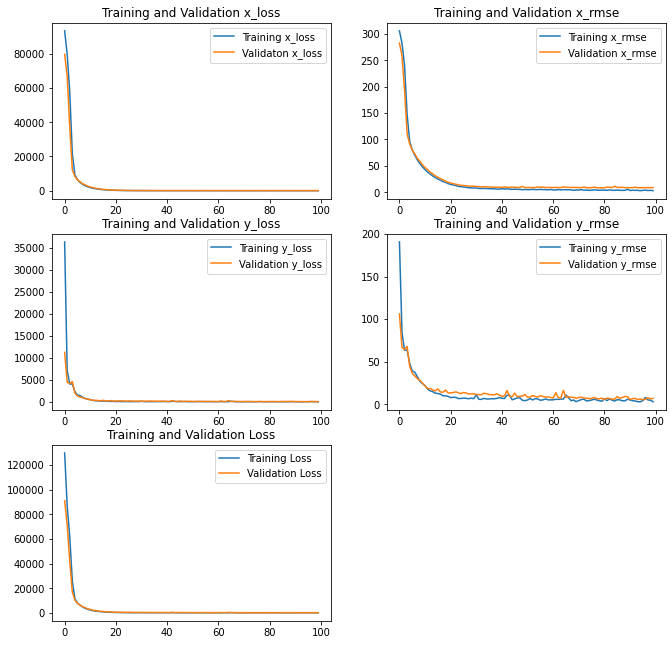

In [242]:
#plotting loss, rmse values
loss = history.history['loss']
val_loss = history.history['val_loss']

x_rmse = history.history['x_root_mean_squared_error']
val_x_rmse = history.history['val_x_root_mean_squared_error']

y_rmse = history.history['y_root_mean_squared_error']
val_y_rmse = history.history['val_y_root_mean_squared_error']

x_loss = history.history['x_loss']
val_x_loss = history.history['val_x_loss']

y_loss = history.history['y_loss']
val_y_loss = history.history['val_y_loss']

epochs_range = range(epochs)

plt.figure(figsize=(11,11))

plt.subplot(3,2,5)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.subplot(3,2,2)
plt.plot(epochs_range, x_rmse, label='Training x_rmse')
plt.plot(epochs_range, val_x_rmse, label='Validation x_rmse')
plt.legend(loc='upper right')
plt.title('Training and Validation x_rmse')

plt.subplot(3,2,1)
plt.plot(epochs_range, x_loss, label='Training x_loss')
plt.plot(epochs_range, val_x_loss, label='Validaton x_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation x_loss')
plt.subplot(3,2,4)
plt.plot(epochs_range, y_rmse, label='Training y_rmse')
plt.plot(epochs_range, val_y_rmse, label='Validation y_rmse')
plt.legend(loc='upper right')
plt.title('Training and Validation y_rmse')

plt.subplot(3,2,3)
plt.plot(epochs_range, y_loss, label='Training y_loss')
plt.plot(epochs_range, val_y_loss, label='Validation y_loss')
plt.legend(loc='upper right')
plt.title('Training and Validation y_loss')
plt.show()

In [243]:
#evaluating model with unseen data.

loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model_m1.evaluate(x=norm_val_X, y=val_Y) # we need to take some data before starting the project to validate here.( unseen data)

print()
print(f'loss: {loss}')
print(f'x_loss: {Y1_loss}')
print(f'y_loss: {Y2_loss}')
print(f'x_rmse: {Y1_rmse}')
print(f'y_rmse: {Y2_rmse}')

2/2 [==============================] - 0s 8ms/step - loss: 191.5874 - x_loss: 142.5623 - y_loss: 49.0251 - x_root_mean_squared_error: 11.9399 - y_root_mean_squared_error: 7.0018

loss: 191.58737182617188
x_loss: 142.56228637695312
y_loss: 49.02508544921875
x_rmse: 11.93994426727295
y_rmse: 7.001791954040527


Our unseen data predicted results look good.

In [244]:
#plotting Predicted vs True values
def plot_predict_vs_true(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    #plt.xlim(plt.xlim())
    #plt.ylim(plt.ylim())
    #plt.plot([-100, 100], [-100, 100])
    #plt.plot(y_true,y_pred,'-')
    plt.show()

#plotting rmse values for x,y
def plot_rmse_metrics(T_metric_name,val_metric_name, title, ylim=50):
    plt.title(title)
    plt.ylim(0, ylim)

    plt.plot(history.history[T_metric_name], color='blue', label=T_metric_name)
    plt.plot(history.history[val_metric_name], color='red', label=val_metric_name)
    plt.show()

3/3 [==============================] - 0s 3ms/step


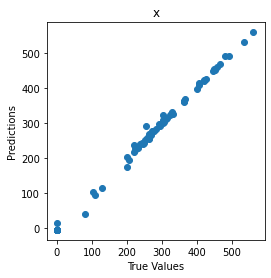

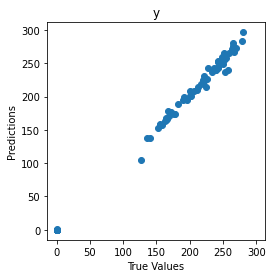

In [245]:
#predicting results
Y_pred = model_m1.predict(norm_test_X)
#Y_pred
m1_x_pred = Y_pred[0]
m1_y_pred = Y_pred[1]
#plotting predicted vs true values.
plot_predict_vs_true(test_Y[0], Y_pred[0], title='x')
plot_predict_vs_true(test_Y[1], Y_pred[1], title='y')



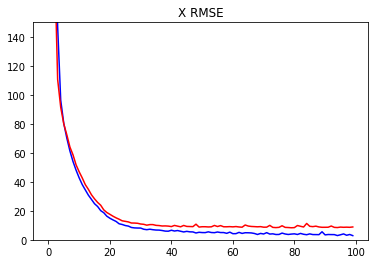

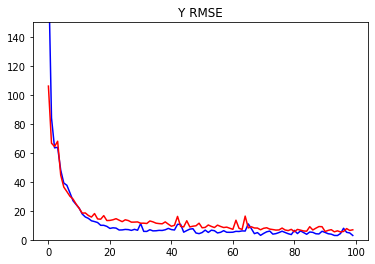

In [246]:
# Plot RMSE
plot_rmse_metrics(T_metric_name='x_root_mean_squared_error',val_metric_name='val_x_root_mean_squared_error', title='X RMSE', ylim=150)
plot_rmse_metrics(T_metric_name='y_root_mean_squared_error',val_metric_name='val_y_root_mean_squared_error', title='Y RMSE', ylim=150)

**Thank You**